# CSC221 Group Project – Part 1
Created by Mireliz Gimenez


In [5]:
import requests
from bs4 import BeautifulSoup
import csv

url = "https://quotes.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

quotes = soup.find_all("div", class_="quote")
data = []

for q in quotes:
    quote_text = q.find("span", class_="text").get_text(strip=True)
    author = q.find("small", class_="author").get_text(strip=True)
    data.append([quote_text, author])

data[:10]


[['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
  'Albert Einstein'],
 ['“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
  'J.K. Rowling'],
 ['“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
  'Albert Einstein'],
 ['“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
  'Jane Austen'],
 ["“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
  'Marilyn Monroe'],
 ['“Try not to become a man of success. Rather become a man of value.”',
  'Albert Einstein'],
 ['“It is better to be hated for what you are than to be loved for what you are not.”',
  'André Gide'],
 ["“I have not failed. I've just found 10,000 ways that won't work.”",
  'Thomas A. Edison'],
 ["“A woman is like a tea ba

In [6]:
with open("quotes.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Quote", "Author"])
    writer.writerows(data)

print("CSV saved successfully!")


CSV saved successfully!


In [7]:
import pandas as pd

df = pd.DataFrame(data, columns=["Quote", "Author"])
df.head(10)


,Quote,Author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe
5,“Try not to become a man of success. Rather be...,Albert Einstein
6,“It is better to be hated for what you are tha...,André Gide
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin


In [8]:
author_counts = df["Author"].value_counts().reset_index()
author_counts.columns = ["Author", "Number of Quotes"]
author_counts


,Author,Number of Quotes
0,Albert Einstein,3
1,J.K. Rowling,1
2,Jane Austen,1
3,Marilyn Monroe,1
4,André Gide,1
5,Thomas A. Edison,1
6,Eleanor Roosevelt,1
7,Steve Martin,1


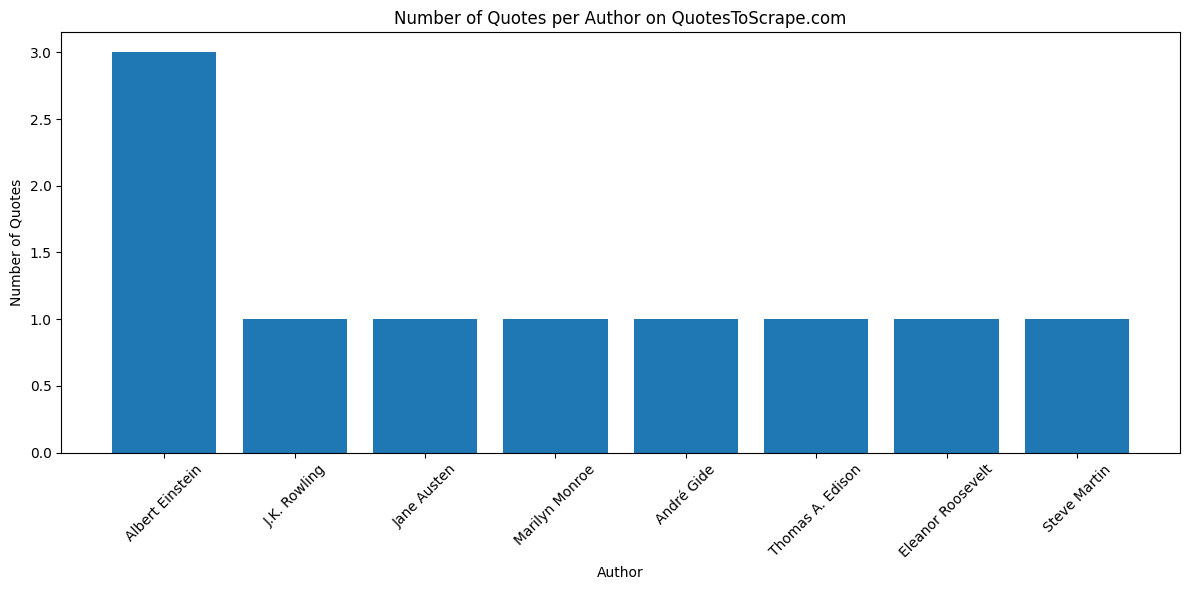

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(author_counts["Author"], author_counts["Number of Quotes"])
plt.xlabel("Author")
plt.ylabel("Number of Quotes")
plt.title("Number of Quotes per Author on QuotesToScrape.com")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
